In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk 

from matplotlib import style
style.use('dark_background')

In [2]:
train_df = pd.read_csv('train_data.csv').drop(['ID','HealthServiceArea'], axis = 1)
test_df = pd.read_csv('test_data.csv')

In [3]:
print(train_df['PaymentTypology'].sort_values().unique())
print(test_df['PaymentTypology'].sort_values().unique())

['Blue Cross/Blue Shield' 'Federal/State/Local/VA'
 'Managed Care, Unspecified' 'Medicaid' 'Medicare' 'Miscellaneous/Other'
 'Private Health Insurance' 'Self-Pay' 'Unknown']
['Blue Cross/Blue Shield' 'Department of Corrections'
 'Federal/State/Local/VA' 'Managed Care, Unspecified' 'Medicaid'
 'Medicare' 'Miscellaneous/Other' 'Private Health Insurance' 'Self-Pay'
 'Unknown']


In [4]:
print(train_df['TypeOfAdmission'].sort_values().unique())
print(test_df['TypeOfAdmission'].sort_values().unique())

['Elective' 'Emergency' 'Newborn' 'Urgent']
['Elective' 'Emergency' 'Newborn' 'Trauma' 'Urgent']


In [5]:
print(train_df['CCSProcedureCode'].sort_values().unique())
print(test_df['CCSProcedureCode'].sort_values().unique())

[ -1   0 115 216 220 228 231]
[ -1   0 115 216 220 228 231]


In [6]:
encode_col = ['Gender', 
              'Race', 
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology', 
              'EmergencyDepartmentIndicator']

for col in encode_col:
    dummy = pd.get_dummies(train_df[col])
    train_df = pd.concat([train_df, dummy], axis=1)
#     if col == 'TypeOfAdmission':
#         missing_type = ["Trauma","Not Available"]
#         for t in missing_type:
#             if t not in X_copy.columns:
#                 X[t] = 0
#         X_copy = X_copy.drop(col, axis=1)
#     else:
    train_df = train_df.drop(col, axis=1)

# For the "TypeOfAdmission" must have "Trauma" and "Not Available" for future prediction


# Check X_copy
train_df.columns

Index([ 'APRSeverityOfIllnessCode',               'BirthWeight',
             'AverageCostInCounty',    'AverageChargesInCounty',
           'AverageCostInFacility',  'AverageChargesInFacility',
          'AverageIncomeInZipCode',              'LengthOfStay',
                               'F',                         'M',
                               'U',    'Black/African American',
                    'Multi-racial',                'Other Race',
                           'White',                  'Elective',
                       'Emergency',                   'Newborn',
                          'Urgent',                          -1,
                                 0,                         115,
                               216,                         220,
                               228,                         231,
          'Blue Cross/Blue Shield',    'Federal/State/Local/VA',
       'Managed Care, Unspecified',                  'Medicaid',
                        '

In [7]:
train_df['LengthOfStay'] = train_df['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_df['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

<AxesSubplot:>

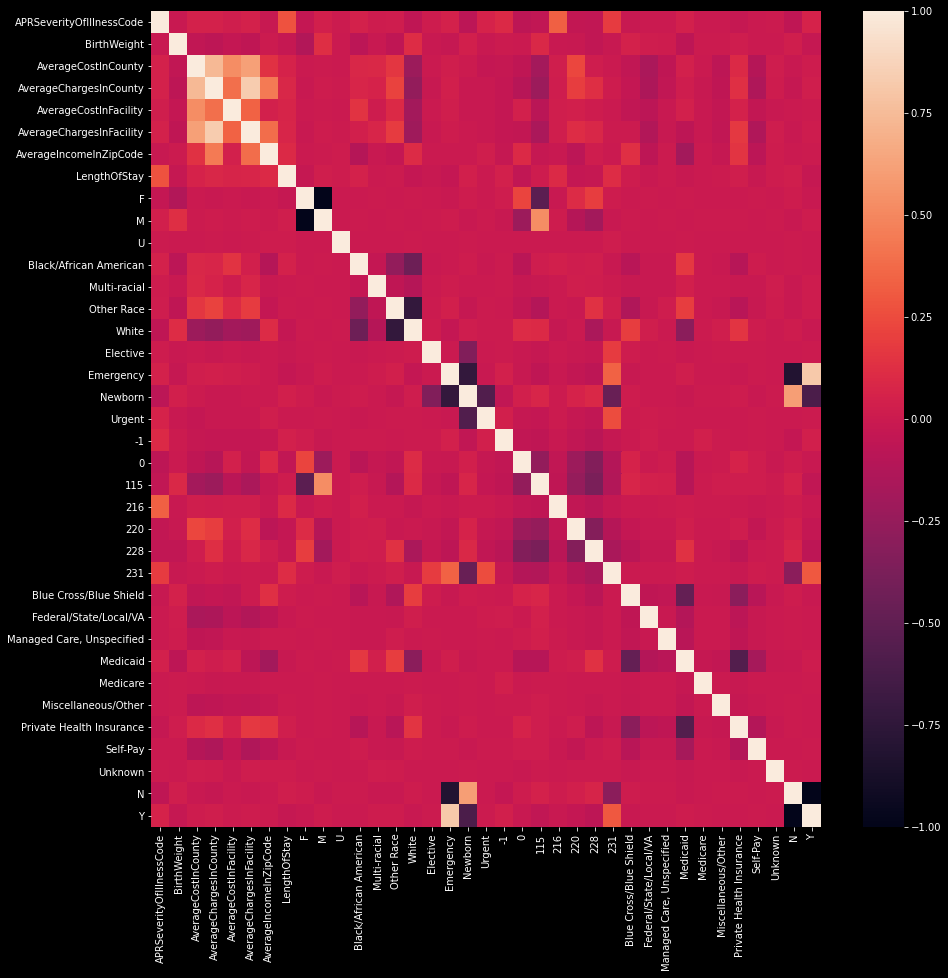

In [8]:
correlations = train_df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 

sns.heatmap(correlations, ax = ax)